# To do 
1) save plots,
2) breakpoints: add statistics test to find the number of breakpoints,
3) add statistical test analysis.

# Market Indices

In [25]:
#!/usr/bin/env python3.10.4
import sys
import numpy as np
import pandas as pd
import datetime as dt
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import pandas_market_calendars as mcal
sys.path.append('../lib/')
from plot_functions import *
from utils import *
from functions import *

In [26]:
# Stok indices
# Retrieve financial data for indices from "https://finance.yahoo.com/world-indices"
# ^GSPC: Standard and Poor's 500
# ^DJI: Dow Jones Industrial Index
# ^IXIC: NASDAQ_Composite
# ^RUT: Russel 2000
# S&P 500 (^SPX) options: https://finance.yahoo.com/quote/%5ESPX/options?p=%5ESPX

In [27]:
# Set end date
#end = dt.datetime.now()
end = dt.datetime(2022,3,28)
# Set start date (1 year distance)
#start = end - dt.timedelta(weeks=52)
start = dt.datetime(2021,3,26)

# To evaluate the difference between the dates in terms of business days.
print(f'Days between dates: {(end - start).days} days')

nyse = mcal.get_calendar('NYSE')
bizdays = nyse.valid_days(start_date=start, end_date=end)

print(f'Business days between dates: {len(bizdays)} days')

Days between dates: 367 days
Business days between dates: 254 days


In [28]:
# We concentrate on the Standard and Poor's 500 Index
GSPC_df = read_data_from_yahoo('^GSPC', start, end)
GSPC_df['Date'] = pd.to_datetime(GSPC_df['Date'],
                                 format='%Y-%m-%d')#.dt.strftime('%d-%m-%Y')

# rate of return
r = GSPC_df['Adj Close'].diff(periods=1) / GSPC_df['Adj Close'].to_numpy()
GSPC_df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-03-26,3978.189941,3917.120117,3917.120117,3974.540039,5467850000,3974.540039
1,2021-03-29,3981.830078,3943.250000,3969.310059,3971.090088,4619840000,3971.090088
2,2021-03-30,3968.010010,3944.350098,3963.340088,3958.550049,4103570000,3958.550049
3,2021-03-31,3994.409912,3966.979980,3967.250000,3972.889893,4564980000,3972.889893
4,2021-04-01,4020.629883,3992.780029,3992.780029,4019.870117,4151240000,4019.870117
...,...,...,...,...,...,...,...
249,2022-03-22,4522.000000,4469.100098,4469.100098,4511.609863,3962880000,4511.609863
250,2022-03-23,4501.069824,4455.810059,4493.100098,4456.240234,4014360000,4456.240234
251,2022-03-24,4520.580078,4465.169922,4469.979980,4520.160156,3573430000,4520.160156
252,2022-03-25,4546.029785,4501.069824,4522.910156,4543.060059,3577520000,4543.060059


We concentrate on the Standard and Poor's 500 Index.
<br> In case, we also remove the last row, which appears to be essentially a repetition of the penultimate row.

In [29]:
# Compute the logarithm return for each index dataframe
GSPC_df = log_return(GSPC_df)

GSPC_df

,Date,High,Low,Open,Close,Volume,Adj Close,y_lr,y_plr
0,2021-03-29,3981.830078,3943.250000,3969.310059,3971.090088,4619840000,3971.090088,-0.000868,-0.086839
1,2021-03-30,3968.010010,3944.350098,3963.340088,3958.550049,4103570000,3958.550049,-0.003163,-0.316283
2,2021-03-31,3994.409912,3966.979980,3967.250000,3972.889893,4564980000,3972.889893,0.003616,0.361595
3,2021-04-01,4020.629883,3992.780029,3992.780029,4019.870117,4151240000,4019.870117,0.011756,1.175583
4,2021-04-05,4083.419922,4034.439941,4034.439941,4077.909912,3999760000,4077.909912,0.014335,1.433499
...,...,...,...,...,...,...,...,...,...
248,2022-03-22,4522.000000,4469.100098,4469.100098,4511.609863,3962880000,4511.609863,0.011241,1.124070
249,2022-03-23,4501.069824,4455.810059,4493.100098,4456.240234,4014360000,4456.240234,-0.012349,-1.234863
250,2022-03-24,4520.580078,4465.169922,4469.979980,4520.160156,3573430000,4520.160156,0.014242,1.424201
251,2022-03-25,4546.029785,4501.069824,4522.910156,4543.060059,3577520000,4543.060059,0.005053,0.505338


## Data visualization

Intercept: 4198.616275127846, Index: 1.6855590252069033


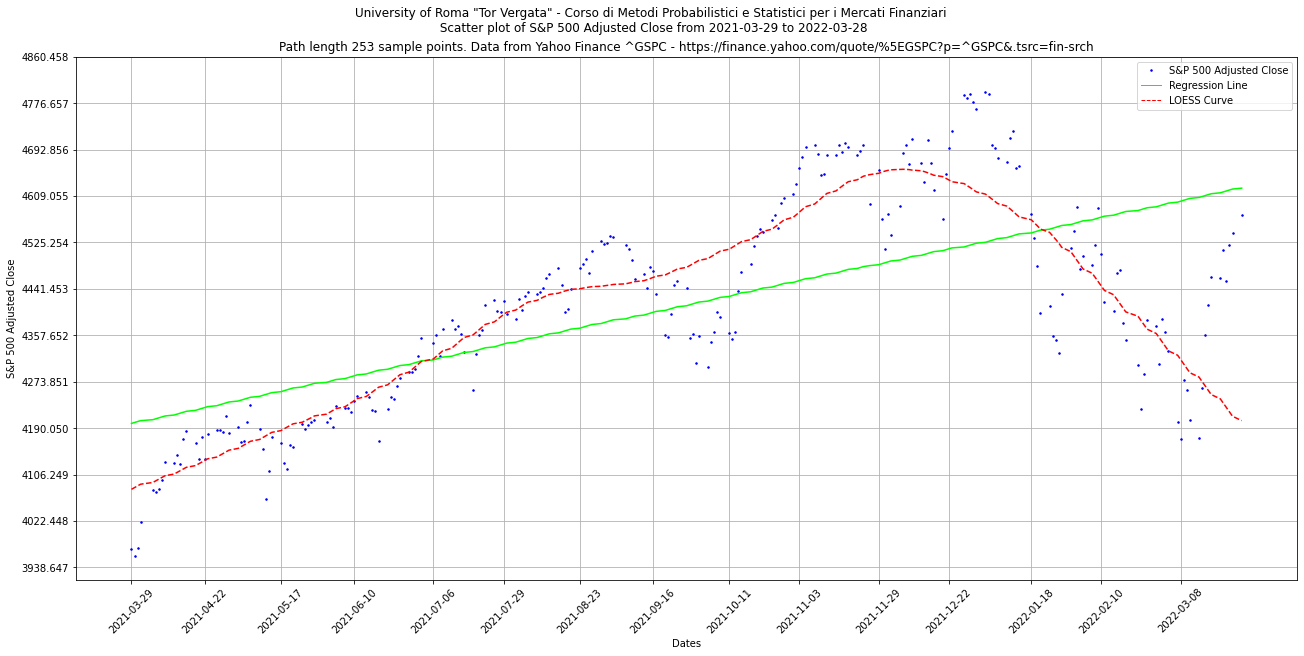

In [30]:
# Hence, we plot the GSPC adjusted close
link = "https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC&.tsrc=fin-srch"
data_visualization(GSPC_df, kind='scatter', symbol='^GSPC',
                   link=link, column='Adj Close')

Intercept: 4198.616275127846, Index: 1.6855590252069033


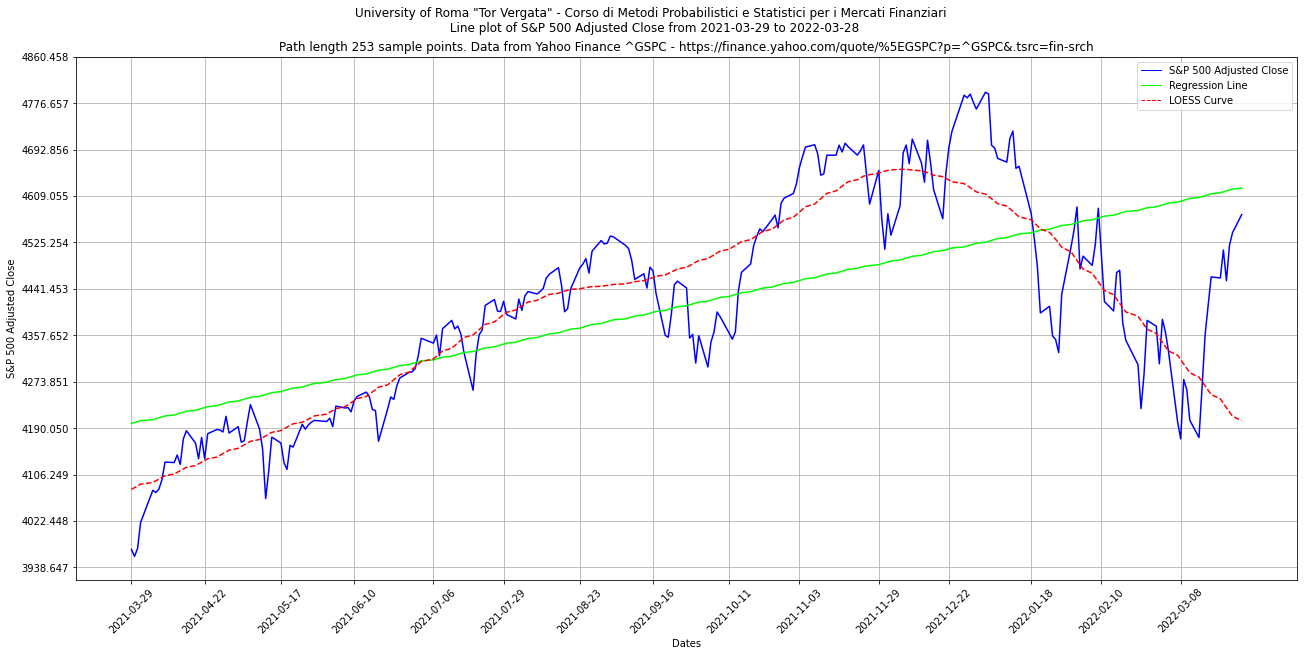

In [31]:
data_visualization(GSPC_df, kind='line', symbol='^GSPC',
                   link=link, column='Adj Close')

From the inspection of the scatter and line plot of S&P 500 percentage logarithm returns,
<br> we have visual evidence for constant (zero) mean.
<br> Infact, considering the linear regression of the percentage logarithm returns against the index variable,
<br> we obtain the following estimates of the coefficients of the regression line.

Intercept: 0.13259745689898048, Index: -0.0006106413080577082


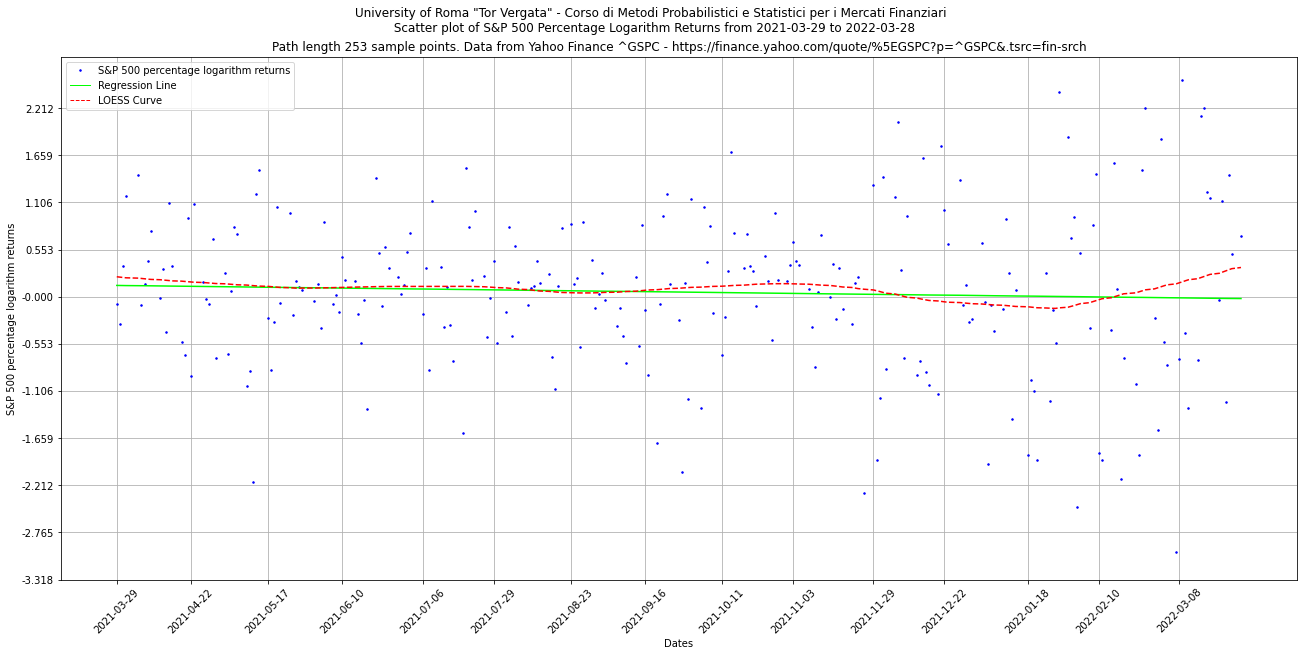

In [32]:
data_visualization(GSPC_df, kind='scatter', symbol='^GSPC',
                   link=link, column='y_plr')

These imply an essentially horizontal regression line with intercept almost 0.
<br> In addition, we can see an almost flat LOESS curve very closely intertwined, nearly superposed, to the regression line.
<br> On the other hand, we do not have visual evidence for constant variance.
<br> The spread of data around the mean appears to increase as the time approaches to the current date.

Intercept: 0.13259745689898048, Index: -0.0006106413080577082


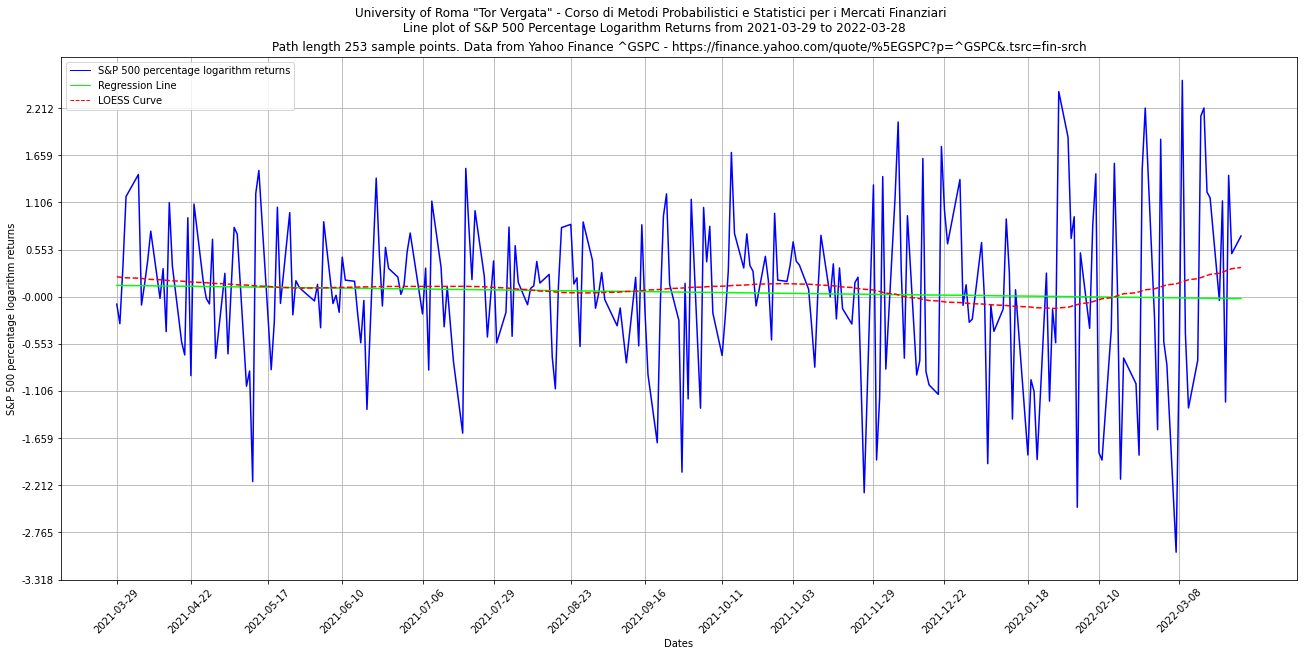

In [33]:
data_visualization(GSPC_df, kind='line', symbol='^GSPC',
                   link=link, column='y_plr')

For the moment we don't apply specific tests for the constant mean, 
<br> but we tackle the issue of seemingly non constant variance.
<br> To this, we resort on some tests, the so called homoskedasticity tests. 
<br> As a preliminary step, we consider the issue of the possible autocorrelation in the percentage logarithm returns.
<br> First, we draw the autocorrelogram and the partial autocorrelogram of the percentage logarithm returns.

## Autocorrelogram

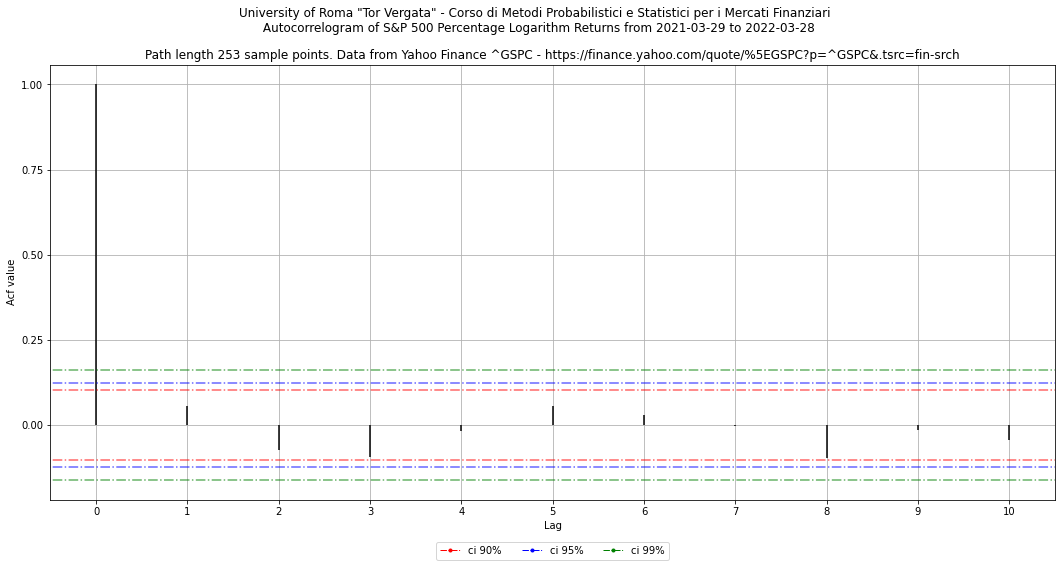

In [34]:
autocorrelogram(GSPC_df, link=link, symbol='^GSPC')

With reference to the autocorrelogram of the percentage logarithm returns, the number of peaks corresponding to positive 
<br> lags crossing the confidence lines is within the statistical tolerance. In fact, we have no peaks crossing the $95\%$ 
<br> confidence lines (the tolerance is *floor(maxlag $\cdot 0.05$)=floor($10 \cdot 0.05$)=$0$* and only one peak crossing the $90\%$ 
<br> confidence lines (the tolerance is *floor(maxlag $\cdot 0.10$)=floor($10 \cdot 0.10$)=$1$*.
<br> We have no visual evidence for autocorrelation.  

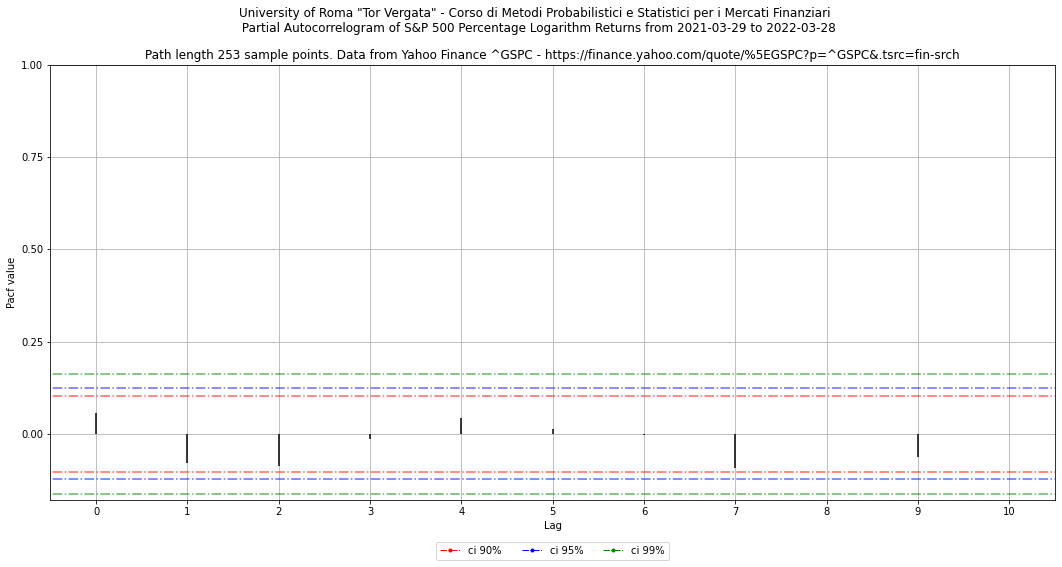

In [35]:
autocorrelogram(GSPC_df, partial=True, link=link, symbol='^GSPC')

With reference to the partial autocorrelogram of the percentage logarithm returns, the number of peaks corresponding to positive 
<br> lags crossing the confidence lines is within the statistical tolerance. In fact, we have no peaks crossing both the $95\%$ 
<br> confidence lines (the tolerance is still *floor(maxlag $\cdot 0.05$)=floor($10 \cdot 0.05$)=$0$* and the $90\%$ confidence lines 
<br> (the tolerance is still *floor(maxlag $\cdot 0.10$)=floor($10 \cdot 0.10$)=$1$*.
<br> We have no visual evidence for partial autocorrelation.

Summarizing, so far, we have no visual evidence against the hypothesis that the percentage logarithm returns have been generated 
<br> by uncorrelated random sampling at the $90\%$ confidence level.
<br> However, note that if we consider the squared percentage logarithm returns we have a clear visual evidence for against the hypothesis that the percentage logarithm returns have been generated 
<br> by independent random sampling at any standard confidence level. 

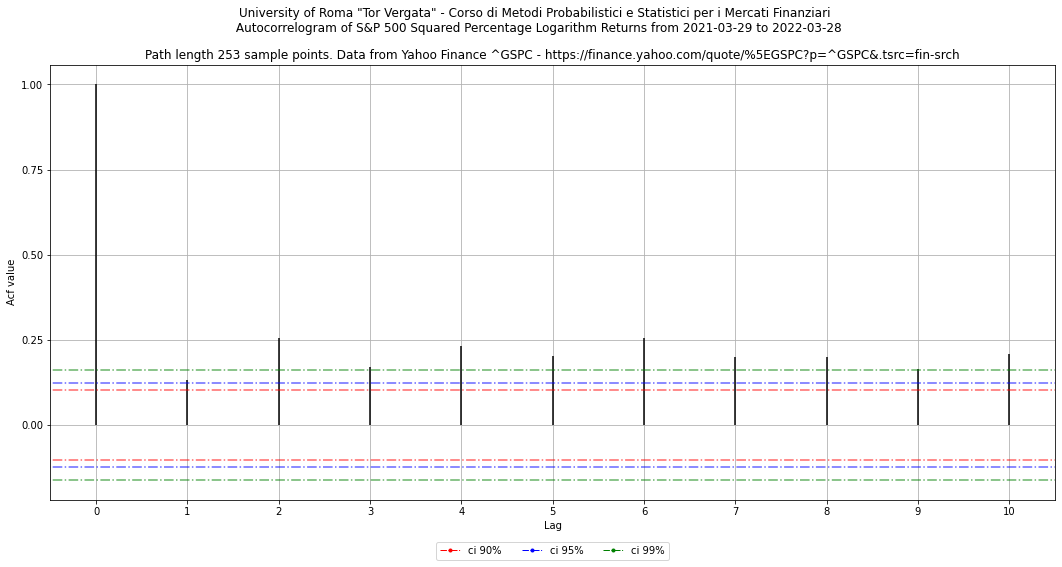

In [36]:
autocorrelogram(GSPC_df, link=link, squared=True, symbol='^GSPC')

This prevents the use of STDV as an estimate of the standard deviation of the S&P 500 Percentage Logarithm Returns.
<br>
<br> However, the visual evidence suggests that a brisk increase in the volatility has occurred in recent times. 
<br> Therefore, we consider the possibility of determining a break-point in the structure of the variance of the data set GSPC_df['Y_plr'].
<br> To this, since as already remarked above, we can see an almost flat LOESS curve nearly superposed to an horizontal regression line 
<br> with intercept almost 0, we consider the possibility of determining a break-point in the structure of the squares of our data set.


In [37]:
import matplotlib.pyplot as plt
import ruptures as rpt

n_breaks = 3
GSPC_df['y_plr_sq'] = GSPC_df['y_plr'] ** 2.
Y_plr_sq = GSPC_df['y_plr_sq']
model = rpt.Dynp(model="l1")
model.fit(Y_plr_sq.to_numpy())
breaks = model.predict(n_bkps=n_breaks-1)


In [38]:
breaks

[170, 220, 253]

In [39]:
breaks_rpt = []
for i in breaks:
    breaks_rpt.append(Y_plr_sq.index[i-1])

breaks_rpt

[169, 219, 252]

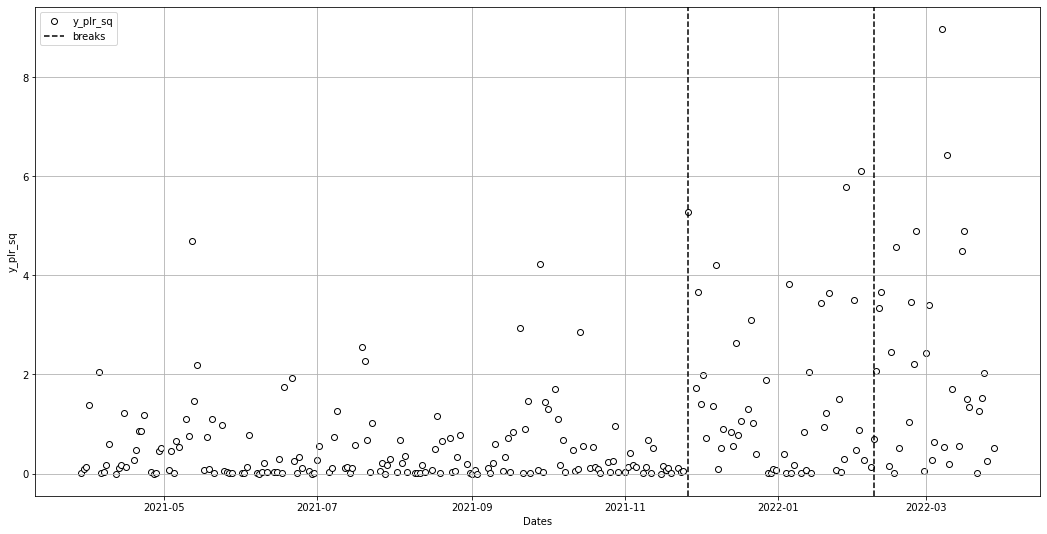

In [40]:
plt.figure(figsize=(18, 9))

plt.scatter(GSPC_df['Date'], GSPC_df['y_plr_sq'], fc='w', ec='k', label='y_plr_sq')
kwargs = {'c':'k', 'ls':'dashed'}
print_legend = True
# remove last vertical dashed line
for i in breaks_rpt[:-1]:
    if print_legend:
        plt.axvline(GSPC_df.loc[i, 'Date'], label='breaks', **kwargs)
        print_legend = False
    else:
        plt.axvline(GSPC_df.loc[i, 'Date'], **kwargs)

plt.xlabel('Dates')
plt.ylabel('y_plr_sq')
plt.grid()
plt.legend(loc='upper left')
plt.show()

In [41]:
range_I = GSPC_df.index[breaks_rpt[0]:]
range_II = GSPC_df.index[breaks_rpt[1]:] 

Y_plr_range_I = GSPC_df.loc[range_I, ['Date', 'y_plr']].reset_index(drop=True)
Y_plr_range_I['Index'] = Y_plr_range_I.index 
Y_plr_range_II = GSPC_df.loc[range_II, ['Date', 'y_plr']]


Y_plr_range_I

,Date,y_plr,Index
0,2021-11-26,-2.298701,0
1,2021-11-29,1.311384,1
2,2021-11-30,-1.914338,2
3,2021-12-01,-1.188554,3
4,2021-12-02,1.409464,4
...,...,...,...
79,2022-03-22,1.124070,79
80,2022-03-23,-1.234863,80
81,2022-03-24,1.424201,81
82,2022-03-25,0.505338,82


### The autocorrelogram of the first subset of percentage logarithm returns

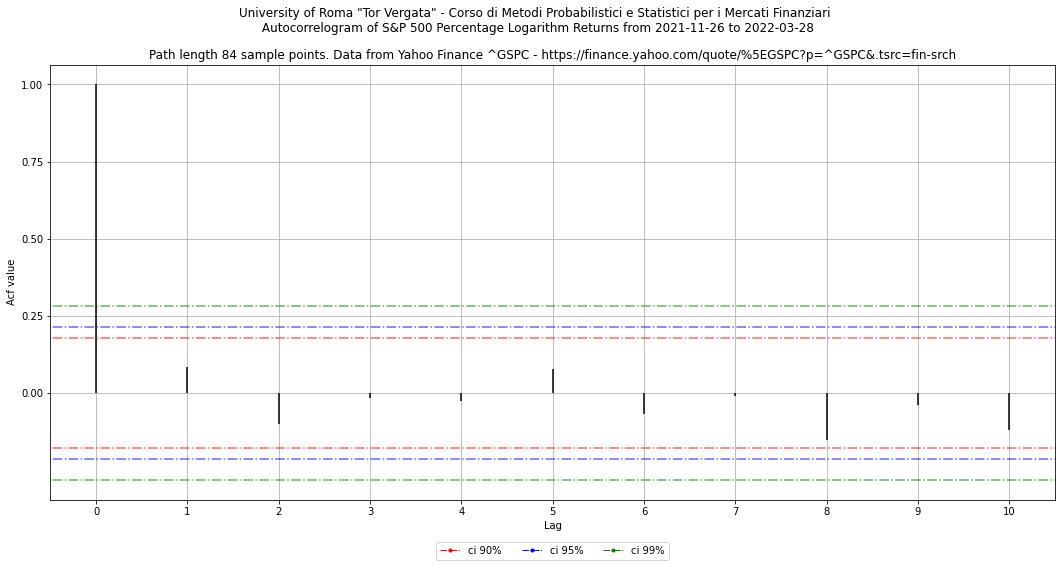

In [42]:
autocorrelogram(Y_plr_range_I, link=link, symbol='^GSPC')

### The partial autocorrelogram of the first subset of percentage logarithm returns

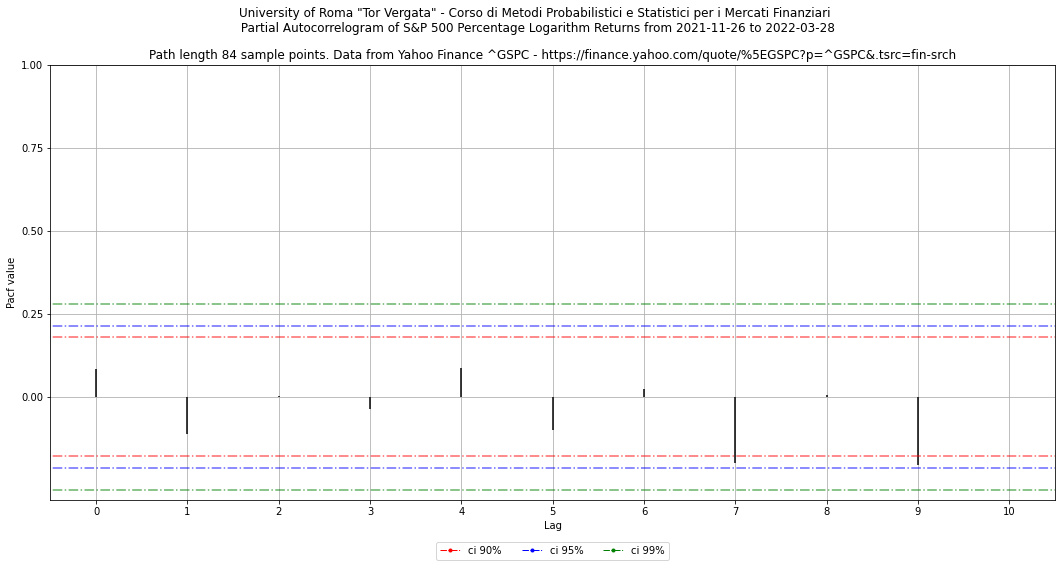

In [43]:
autocorrelogram(Y_plr_range_I, partial=True, link=link, symbol='^GSPC')

### The autocorrelogram of the first subset of squared percentage logarithm returns

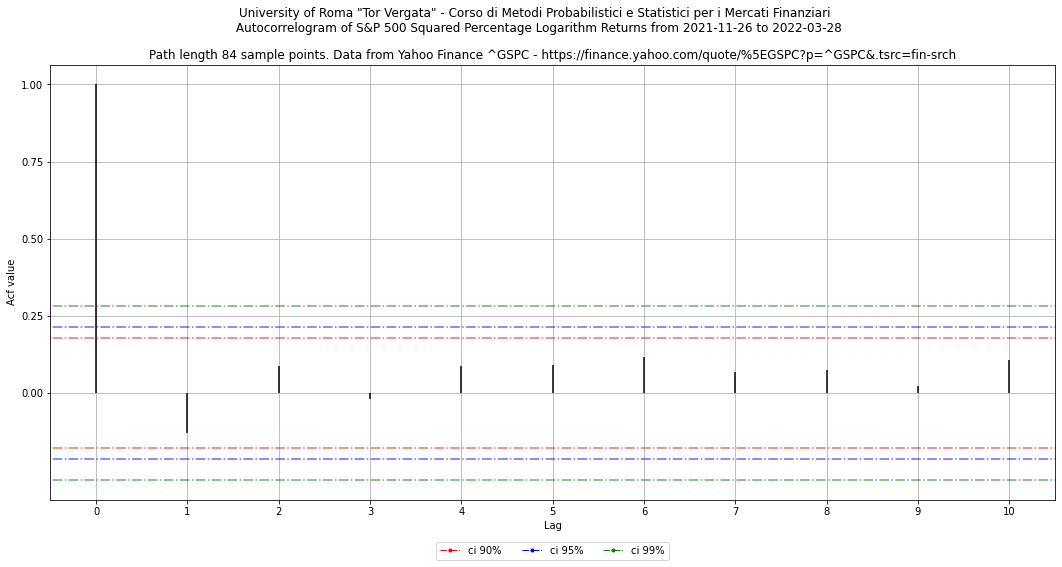

In [44]:
autocorrelogram(Y_plr_range_I, link=link, squared=True, symbol='^GSPC')

### The partial autocorrelogram of the first subset of squared percentage logarithm returns

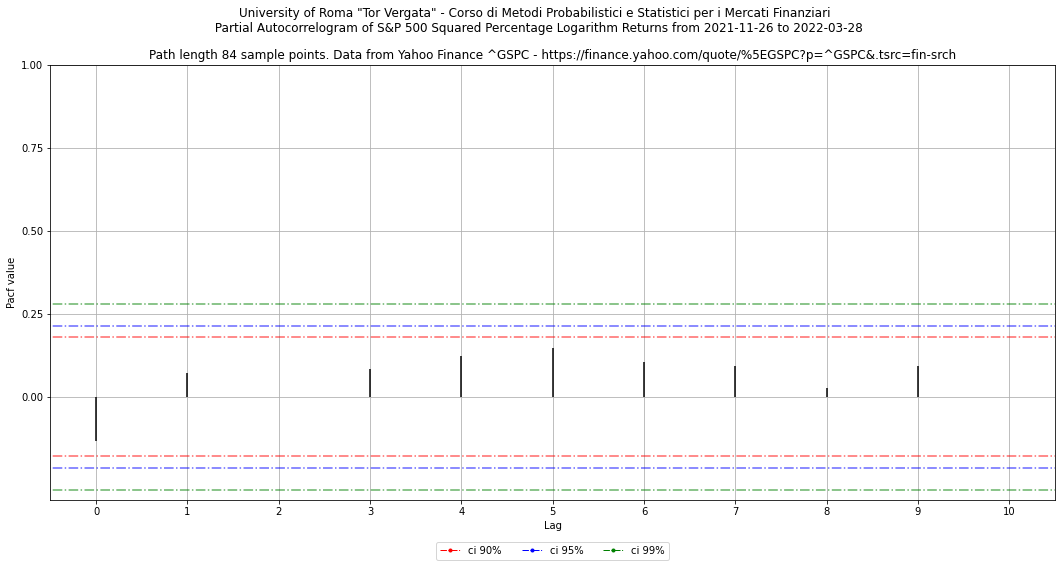

In [45]:
autocorrelogram(Y_plr_range_I, link=link, partial=True, squared=True, symbol='^GSPC')

Summarizing, so far, we have no visual evidence against the hypothesis that both the percentage and the squared percentage 
<br> logarithm returns have been generated by uncorrelated random sampling at the $90\%$ confidence level.
<br> This is a rather strong indication for independence in the generating random sampling.

<br> We now consider some homoskedasticity tests. In particular, the Breusch-Pagan (BP) and White (W) test.
<br> Both of them consider as the null hypothesis that data have been generated by an independent Gaussian process with constant 
<br> variance and as the alternative hypothesis that the variance of the generating process is not constant. 
<br> Presenting a detailed explanation of the BP and W test is beyond the goal of this script. We just show how to apply them. 
<br> We have

In [46]:
x  = Y_plr_range_I['y_plr'].to_numpy()
bootstrap_summary(x=x, N=1000, ci=0.90)

,mean,std,P5.0,P95.0
mean,-0.030009,0.139167,-0.261158,0.193730
skew,0.009681,0.170444,-0.257307,0.291804
kurtosis,-0.815906,0.212184,-1.134103,-0.431886


In [47]:
# fit regression model
fit = smf.ols('y_plr ~ Index', data=Y_plr_range_I).fit()
print(fit.summary())

# Conduct the Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

N = len(Y_plr_range_I)
y_plr_model = np.c_[np.ones(N), Y_plr_range_I['y_plr']]

# Get the bptest result
bptest_result = sms.het_breuschpagan(fit.resid, y_plr_model)
 
lzip(names, bptest_result)

                            OLS Regression Results                            
Dep. Variable:                  y_plr   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.5723
Date:                Tue, 03 May 2022   Prob (F-statistic):              0.452
Time:                        18:13:22   Log-Likelihood:                -141.35
No. Observations:                  84   AIC:                             286.7
Df Residuals:                      82   BIC:                             291.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2185      0.285     -0.767      0.4

[('Lagrange multiplier statistic', 0.007318033421990222),
 ('p-value', 0.9318277202905111),
 ('f-value', 0.007144416948629444),
 ('f p-value', 0.932845325077979)]

Thus, the 90% Gaussian confidence interval for both the skewness and kurtosis contain the point 0. 
<br> As a consequence, assuming the validity of Gaussian confidence interval, we cannot reject at the 10% significance level 
<br> the hypothesis that the distribution which generates the percentage logarithm returns is not leptokurtic. 
<br> This advocates for the unstudentized versions of the tests.

In [48]:
# Get the White result
white_test = sms.het_white(fit.resid, y_plr_model)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 81.93771786814993, 'Test Statistic p-value': 1.6123177496347983e-18, 'F-Statistic': 1609.1288007635776, 'F-Test p-value': 6.277491192018311e-66}
